### Modeling 시작

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

warnings.filterwarnings("ignore")

### Dataset 준비
사전에 미리 전처리 해둔 데이터셋을 기반으로 학습한다.

In [2]:
dataset = pd.read_csv(r"./test.csv")
dataset

,title,content,views,label
0,출첵,출첵,7,0
1,출석합니다,출석합니다좋은밤 되세요,7,0
2,투명페인트는 뭘로 지워야할까요,붓펜 작업중 엉뚱한 곳에 묻어서굳었네요,79,0
3,전동 압분 한번 사봤습니다,거의 열흘 전에 택배 온거 같은데이제 꺼내보네요ㅋㅋㅋ 크기에 한번 놀라고 헤드 부...,340,1
4,역시 차는 광이 나야,무슨 차던 제대로 번쩍이는 차에 한 번 더 눈길이 갑니다ㅎㅎ유일하게 꾸준히 재밌게 ...,461,1
...,...,...,...,...
3030,이와키로 내린 커피,한 없는 기다림 후의 짧은 기쁨 기쁨을 되새김질하며 또다시 긴 기다림 인생과 커피는...,166,1
3031,flowmeter에 위치선정,아침에 삽질한번하고 엄청나게 공부하고있네요 ㅎㅎㅎㅎㅎ 좋은 삽질인듯 플로우메터 위치...,280,1
3032,퇴근길,기흥에서 일산까지 퇴근길 햄버거 생각나 간만에 녹사평역 근처 썬더버거 들러 버거 하...,198,1
3033,서울공업사 왔다가는중 입니다,클리외님과 에소프릭님에 도움으로 알게되서 편하게 찾아갔네요사장님은 바로 알아체시더군...,245,1


In [3]:
dataset['label'].value_counts() # 라벨값이 어느정도 균등하게 분포되어 있는 모습

label
1    1521
0    1514
Name: count, dtype: int64

In [4]:
dataset.head()

,title,content,views,label
0,출첵,출첵,7,0
1,출석합니다,출석합니다좋은밤 되세요,7,0
2,투명페인트는 뭘로 지워야할까요,붓펜 작업중 엉뚱한 곳에 묻어서굳었네요,79,0
3,전동 압분 한번 사봤습니다,거의 열흘 전에 택배 온거 같은데이제 꺼내보네요ㅋㅋㅋ 크기에 한번 놀라고 헤드 부...,340,1
4,역시 차는 광이 나야,무슨 차던 제대로 번쩍이는 차에 한 번 더 눈길이 갑니다ㅎㅎ유일하게 꾸준히 재밌게 ...,461,1


### Feature engineering

In [5]:
dataset.head()

,title,content,views,label
0,출첵,출첵,7,0
1,출석합니다,출석합니다좋은밤 되세요,7,0
2,투명페인트는 뭘로 지워야할까요,붓펜 작업중 엉뚱한 곳에 묻어서굳었네요,79,0
3,전동 압분 한번 사봤습니다,거의 열흘 전에 택배 온거 같은데이제 꺼내보네요ㅋㅋㅋ 크기에 한번 놀라고 헤드 부...,340,1
4,역시 차는 광이 나야,무슨 차던 제대로 번쩍이는 차에 한 번 더 눈길이 갑니다ㅎㅎ유일하게 꾸준히 재밌게 ...,461,1


### Dataset 분할

In [6]:
train_data, test_data = train_test_split(dataset, test_size=0.25, random_state=0) # 7.5 : 2.5 비율로 분할한다.

In [7]:
print(train_data.shape)

(2276, 4)


In [8]:
print(test_data.shape)

(759, 4)


### 라벨값 분포 확인

각 라벨 간에 균형은 알맞은지, 편향적 샘플링이 되지는 않는지 확인한다.

In [9]:
train_data['label'].value_counts()

label
1    1138
0    1138
Name: count, dtype: int64

In [10]:
test_data['label'].value_counts()

label
1    383
0    376
Name: count, dtype: int64

### Stop words 정의

In [11]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

### 토큰분리

title과 content의 토큰 분리를 별도로 실시한다.

In [12]:
mecab = Mecab(r"C:\mecab\mecab-ko-dic") 

train_data['tokenized_title'] = train_data['title'].apply(mecab.morphs)
train_data['tokenized_title'] = train_data['tokenized_title'].apply(lambda x: [item for item in x if item not in stopwords])
test_data['tokenized_title'] = test_data['title'].apply(mecab.morphs)
test_data['tokenized_title'] = test_data['tokenized_title'].apply(lambda x: [item for item in x if item not in stopwords])

In [13]:
train_data['tokenized_content'] = train_data['content'].apply(mecab.morphs)
train_data['tokenized_content'] = train_data['tokenized_content'].apply(lambda x: [item for item in x if item not in stopwords])
test_data['tokenized_content'] = test_data['content'].apply(mecab.morphs)
test_data['tokenized_content'] = test_data['tokenized_content'].apply(lambda x: [item for item in x if item not in stopwords])

In [14]:
train_data

,title,content,views,label,tokenized_title,tokenized_content
351,인천 선학역 인근 세차장 추천바래요,일하러 인천왓는데세차를 벌써 달째못하고잇네요게러지나 실내세차장이 있을까요차가커서 기...,194,1,"[인천, 선학역, 인근, 세차장, 추천, 바래, 요]","[일, 하, 러, 인천, 왓, 는데, 세차, 벌써, 달째, 못, 하, 고, 잇, 네..."
838,앗 회원님 차 발견,아까 아부지 차 세차하고 가는길에 회원님 차 발견했네요 길거리에서는 처음 마주친지라...,623,1,"[앗, 회원, 님, 차, 발견]","[아까, 아부지, 차, 세차, 하, 고, 길, 회원, 님, 차, 발견, 했, 네요,..."
2980,즐거운 하루 보내고 계신지요,벌써 금요일입니다어떻게 하루하루가 지나가는지 모를 정도로빠르게 지나감을 느끼네요즐거...,161,1,"[즐거운, 하루, 보내, 고, 계신, 지요]","[벌써, 금요일, 입니다, 어떻게, 하루하루, 지나가, 는지, 모를, 정도, 로, ..."
1385,전달,빵빵 고정틀 무리 전달 왔어요 ㅋㅋㄱㄲㅋ막자랍니당 빵빵빠또 그리면서 넘넘 재밌었답니...,174,1,[전달],"[빵빵, 고정, 틀, 무리, 전달, 왔, 어요, ㅋㅋ, ㄱ, ㄲㅋ막자랍니당, 빵빵,..."
1665,앱 인증합니다,사진그림으로 저장이 안되네요ㅠ,8,0,"[앱, 인증, 합니다]","[사진, 그림, 저장, 안, 되, 네요, ㅠ]"
...,...,...,...,...,...,...
763,반갑습니다,아래 양식에 맞게 가입인사를 작성하여 주시면 감사하겠습니다 닉네임 창원II...,15,0,"[반갑, 습니다]","[아래, 양식, 맞, 게, 가입, 인사, 작성, 하, 여, 주, 시, 면, 감사, ..."
835,간만에 신상쓰기,오랜만에 평일 퇴근후 세차장 가는길 항상 그래왔던 것처럼 칼퇴 ㅋㅋ세차장 갈때는 항...,499,1,"[간만에, 신상, 쓰, 기]","[오랜만, 평일, 퇴근, 후, 세, 차장, 길, 항상, 그래왔, 던, 것, 처럼, ..."
1653,모동숲 질문,몇년전에 튀동숲하다가 이번에 스위치 구매해서 모동숲 시작하는데모동숲에도 지노 있나요...,70,0,"[모동, 숲, 질문]","[몇, 년, 전, 튀, 동, 숲, 하, 다가, 이번, 스위치, 구매, 해서, 모동,..."
2607,베르크 폼 미쳤다,코만단테하고 베르크 같이 왔습니다 ㅎㅎ,618,1,"[베르크, 폼, 미쳤, 다]","[코만, 단테, 하고, 베르크, 같이, 왔, 습니다, ㅎㅎ]"


In [15]:
unPopular1 = np.hstack(train_data[train_data.label == 0]['tokenized_title'].values)
popular1 = np.hstack(train_data[train_data.label == 1]['tokenized_title'].values)
unPopular2 = np.hstack(train_data[train_data.label == 0]['tokenized_content'].values)
popular2 = np.hstack(train_data[train_data.label == 1]['tokenized_content'].values)

In [16]:
unpopular_word_count = Counter(unPopular1) # 시퀀스를 토큰화했을 때 가장 자주 등장하는 20개의 토큰을 확인한다.
unpopular_word_count2 = Counter(unPopular2) 
print(unpopular_word_count.most_common(20))
print(unpopular_word_count2.most_common(20))

[('숲', 269), ('하', 230), ('모동', 211), ('세요', 190), ('안녕', 189), ('가입', 173), ('인사', 156), ('사요', 83), ('드립니다', 79), ('질문', 76), ('습니다', 62), ('동', 56), ('합니다', 40), ('토크', 34), ('반갑', 34), ('리조트', 32), ('튀', 30), ('어요', 28), ('후기', 27), ('팔', 27)]
[('하', 2195), ('고', 1004), ('을', 968), ('있', 879), ('필수', 824), ('숲', 604), ('시', 601), ('습니다', 591), ('가입', 583), ('홈', 572), ('주', 564), ('인', 557), ('게', 445), ('바리스타', 437), ('카페', 422), ('중', 413), ('면', 402), ('리조트', 398), ('아', 395), ('사용', 362)]


In [17]:
popular_word_count = Counter(popular1)
popular_word_count2 = Counter(popular2)
print(popular_word_count.most_common(20))
print(popular_word_count2.most_common(20))

[('하', 100), ('세차', 76), ('습니다', 74), ('질문', 73), ('있', 63), ('네요', 58), ('고', 45), ('나요', 44), ('분', 44), ('커피', 43), ('추천', 39), ('주', 36), ('해', 35), ('요', 34), ('을', 33), ('사용', 32), ('게', 32), ('했', 32), ('비', 32), ('숲', 32)]
[('하', 3283), ('고', 2550), ('을', 1946), ('있', 1360), ('습니다', 1330), ('게', 945), ('로', 935), ('네요', 840), ('는데', 834), ('보', 818), ('주', 809), ('시', 804), ('해', 791), ('면', 722), ('어', 689), ('되', 652), ('만', 648), ('입니다', 647), ('했', 621), ('지', 603)]


인기 게시글 제목의 평균 길이 : 6.224077328646748
비인기 게시글 제목의 평균 길이 : 3.68804920913884


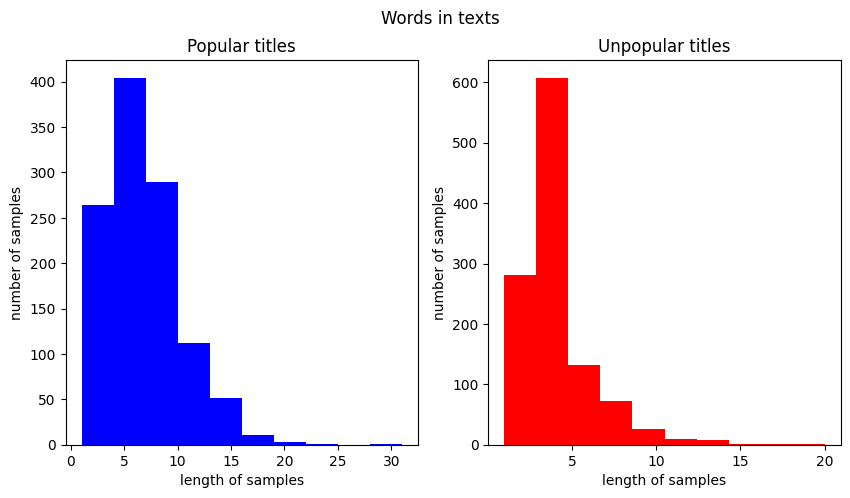

In [18]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized_title'].map(lambda x: len(x))
ax1.hist(text_len, color='blue')
ax1.set_title('Popular titles')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('인기 게시글 제목의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized_title'].map(lambda x: len(x))
ax2.hist(text_len, color='red')
ax2.set_title('Unpopular titles')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('비인기 게시글 제목의 평균 길이 :', np.mean(text_len))
plt.show()

인기 게시글 본문의 평균 길이 : 106.94288224956064
비인기 게시글 본문의 평균 길이 : 62.26625659050966


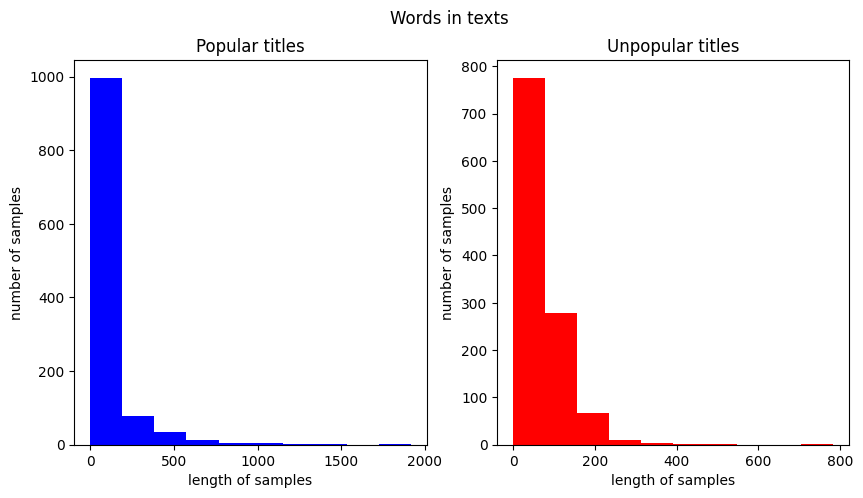

In [19]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized_content'].map(lambda x: len(x))
ax1.hist(text_len, color='blue')
ax1.set_title('Popular titles')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('인기 게시글 본문의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized_content'].map(lambda x: len(x))
ax2.hist(text_len, color='red')
ax2.set_title('Unpopular titles')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('비인기 게시글 본문의 평균 길이 :', np.mean(text_len))
plt.show()

In [20]:
X_train = train_data[['tokenized_title', 'tokenized_content']]
y_train = train_data['label']
X_test= test_data[['tokenized_title', 'tokenized_content']]
y_test = test_data['label']

### 정수형 인코딩
본문과 제목에 대한 인코더를 별도로 정의한다.

In [21]:
tokenizer_for_title = Tokenizer()
tokenizer_for_title.fit_on_texts(X_train.iloc[:, 0].values)

In [22]:
tokenizer_for_content = Tokenizer()
tokenizer_for_content.fit_on_texts(X_train.iloc[:, 1].values)

In [23]:
threshold = 2
total_cnt_of_title = len(tokenizer_for_title.word_index) # 단어의 수
rare_cnt_of_title = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq_of_title = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq_of_title = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer_for_title.word_counts.items():
    total_freq_of_title = total_freq_of_title + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt_of_title = rare_cnt_of_title + 1
        rare_freq_of_title = rare_freq_of_title + value

print('제목 단어 집합(vocabulary)의 크기 :',total_cnt_of_title)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt_of_title))
print("제목 단어 집합에서 희귀 단어의 비율:", (rare_cnt_of_title / total_cnt_of_title)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq_of_title / total_freq_of_title)*100)

제목 단어 집합(vocabulary)의 크기 : 2928
등장 빈도가 1번 이하인 희귀 단어의 수: 1767
제목 단어 집합에서 희귀 단어의 비율: 60.34836065573771
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 15.664893617021278


In [24]:
threshold = 2
total_cnt_of_content = len(tokenizer_for_content.word_index) # 단어의 수
rare_cnt_of_content = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq_of_content = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq_of_content = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer_for_content.word_counts.items():
    total_freq_of_content = total_freq_of_content + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt_of_content = rare_cnt_of_content + 1
        rare_freq_of_content = rare_freq_of_content + value

print('본문 단어 집합(vocabulary)의 크기 :',total_cnt_of_content)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt_of_content))
print("본문 단어 집합에서 희귀 단어의 비율:", (rare_cnt_of_content / total_cnt_of_content)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq_of_content / total_freq_of_content)*100)

본문 단어 집합(vocabulary)의 크기 : 14571
등장 빈도가 1번 이하인 희귀 단어의 수: 7017
본문 단어 집합에서 희귀 단어의 비율: 48.157298744080705
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.6440589945990856


단어의 등장 횟수가 1회인 단어들은 정수 인코딩 대상에서 제외시킨다. 단, zero padding 토큰과 oov 토큰을 고려하여 +2를 해준다.

In [25]:
vocab_size_of_title = total_cnt_of_title - rare_cnt_of_title + 2
print('단어 집합의 크기 :',vocab_size_of_title)

단어 집합의 크기 : 1163


In [26]:
vocab_size_of_content = total_cnt_of_content - rare_cnt_of_content + 2
print('단어 집합의 크기 :',vocab_size_of_content)

단어 집합의 크기 : 7556


In [27]:
# 정수 인코딩

tokenizer_for_title = Tokenizer(vocab_size_of_title, oov_token = 'OOV') 
tokenizer_for_title.fit_on_texts(X_train.iloc[:, 0].values)
X_train['tokenized_title'] = tokenizer_for_title.texts_to_sequences(X_train.iloc[:, 0].values)
X_test['tokenized_title'] = tokenizer_for_title.texts_to_sequences(X_test.iloc[:, 0].values)

In [28]:
# 정수 인코딩

tokenizer_for_content = Tokenizer(vocab_size_of_content, oov_token = 'OOV') 
tokenizer_for_content.fit_on_texts(X_train.iloc[:, 1].values)
X_train['tokenized_content'] = tokenizer_for_content.texts_to_sequences(X_train.iloc[:, 1].values)
X_test['tokenized_content'] = tokenizer_for_content.texts_to_sequences(X_test.iloc[:, 1].values)

제목의 최대 길이 : 31
제목의 평균 길이 : 4.956063268892795


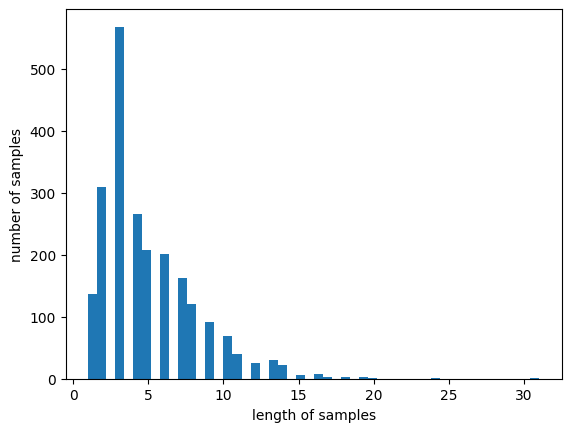

In [29]:
print('제목의 최대 길이 :',max(len(title) for title in X_train.iloc[:, 0].values))
print('제목의 평균 길이 :',sum(map(len, X_train.iloc[:, 0].values))/len(X_train.iloc[:, 0].values))
plt.hist([len(title) for title in X_train.iloc[:, 0].values], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

본문의 최대 길이 : 1916
본문의 평균 길이 : 84.60456942003515


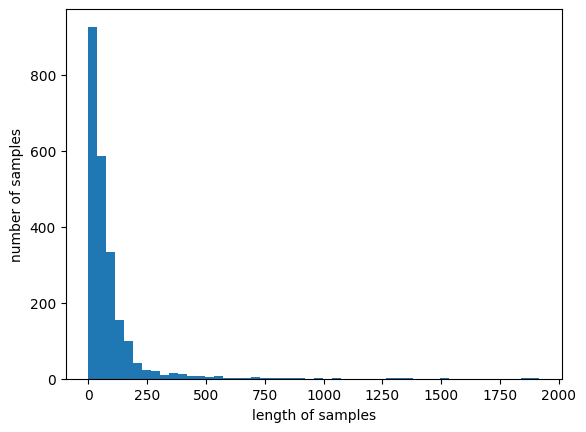

In [30]:
print('본문의 최대 길이 :',max(len(content) for content in X_train.iloc[:, 1].values))
print('본문의 평균 길이 :',sum(map(len, X_train.iloc[:, 1].values))/len(X_train.iloc[:, 1].values))
plt.hist([len(content) for content in X_train.iloc[:, 1].values], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [31]:
def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if(len(sentence) <= max_len):
              count = count + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

제목의 최대길이 = 약 30글자  
본문의 최대길이 = 약 1000자

In [32]:
max_len_title = 30
below_threshold_len(max_len_title, X_train.iloc[:, 0])

전체 샘플 중 길이가 30 이하인 샘플의 비율: 99.95606326889279


In [33]:
max_len_content = 1000
below_threshold_len(max_len_content, X_train.iloc[:, 1])

전체 샘플 중 길이가 1000 이하인 샘플의 비율: 99.64850615114236


패딩 시 각 글자의 최대 길이에 맞는 패딩을 별도로 진행한 후, 열 방향으로 결합한다.

> 총 데이터 건수 : 3035, 0.25의 비율로 test셋을 분할했기에 train의 총 건수는 2276<br>
> padded_sequence_of_title's shape = (2276, 30) ➡️ 30길이로 패딩하기 때문<br>
> padded_sequence_of_content's shape = (2276, 1000) ➡️ 1000길이로 패딩하기 때문<br>

따라서 훈련 데이터의 형상은 (2276, 1030)을 가지게 된다.

In [34]:
padded_title_of_train = pad_sequences(X_train['tokenized_title'].values, maxlen=max_len_title)
padded_content_of_train = pad_sequences(X_train['tokenized_content'].values, maxlen=max_len_content)
X_train = np.concatenate((padded_title_of_train, padded_content_of_train), axis = 1)

padded_title_of_test = pad_sequences(X_test['tokenized_title'].values, maxlen=max_len_title)
padded_content_of_test = pad_sequences(X_test['tokenized_content'].values, maxlen=max_len_content)
X_test = np.concatenate((padded_title_of_test, padded_content_of_test), axis = 1)


In [35]:
X_train.shape
X_train

array([[   0,    0,    0, ...,   87, 1379,   14],
       [   0,    0,    0, ..., 3275,    6,  154],
       [   0,    0,    0, ...,   59, 1284,  164],
       ...,
       [   0,    0,    0, ...,    2,  120,    1],
       [   0,    0,    0, ...,  283,    6,   69],
       [   0,    0,    0, ...,  354,  666,   18]])

In [36]:
X_test.shape
X_test

array([[   0,    0,    0, ...,  333,  928, 3586],
       [   0,    0,    0, ...,    9,  333,   18],
       [   0,    0,    0, ...,  434,    2,   27],
       ...,
       [   0,    0,    0, ...,  160,  220,   21],
       [   0,    0,    0, ...,   55,   29,    1],
       [   0,    0,    0, ..., 7113,    1, 1068]])

In [37]:
y_train = y_train.values
y_train

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [38]:
y_test = y_test.values
y_test

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,

### Bi-Directional LSTM
일반적인 LSTM의 경우 forward 방향으로만 순환하며 Input, Forget, Output gate를 거친다. 이와 다르게 Bidirectional LSTM의 경우 forward와 backward로 순환하며 forward 방향으로만 흐를 때의 단점을 보완할 수 있다.

forward 방향으로만 흐를 때의 단점이란 아래와 같은 경우가 있다.

> 만약 "나는 _ 를 보고싶다" 라는 문장이 있다고 가정하자. _에 들어가는 단어를 예측하는 모델을 일반 LSTM과 Bidirectional LSTM모델 두 가지로 설계했다고 하고, 각 단어가 뱉을 수 있는 단어를 각각 w, g라고 하자. 그렇다면 P(w|를 보고싶다)의 확률과 P(g|를 보고싶다)의 조건부 확률을 비교하자면 후자가 월등하게 낮을 것이다. 한국어를 유창하게 하는 사람이라면 해당 문장을 보고 빈칸에 들어갈 수 있는 단어들을 간략하게 추린다. 하지만 forward 방향으로만 계산하는 알고리즘의 입장에서 w에는 무수히 많은 단어가 할당 될 것이다. 이것이 Bi-Directional LSTM이 가지는 장점이다.

### 모델 구조
모델의 구조는 아래와 같다.

<div align=center><img src="./image_for_markdown/bi-directional LSTM.png"></div>

LSTM과 동일하게 memory cell들을 거쳐 정방향으로 나열된 word vector와 함께 forward 방향으로 순환한 후, 끝에서 다시 역방향으로 나열된 word vector롸 함께 backward 방향으로 순환한다. 총 순환이 두 번 일어나는 것이다. 그렇게 두 번 순환된 결과를 `concat`하여 output layer에 전달한다.

### Data Flow
데이터 플로우는 아래와 같다.

<div align=center><img src="./image_for_markdown/di-directional LSTM data flow.png"></div>

### 아키텍쳐 구조에 대한 함정
normal한 LSTM을 사용할때와 마찬가지로, Multi Layer로 구성한다고 해서 반드시 성능이 좋아지기란 불가하다.

In [55]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(1030, 100))
model.add(Bidirectional(LSTM(128, recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(64, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=4)
mc = ModelCheckpoint('./new_model/model/multi_layer_128_64_64.h5', monitor='val_acc', mode='max', verbose=0, save_best_only=True)
cl = CSVLogger("./new_model/history/1st_train_history.csv")

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    callbacks=[es, mc, cl],
    validation_data = (X_test, y_test),
    batch_size = 32
)

Epoch 1/100
72/72 [==============================] - 1072s 15s/step - loss: 0.6475 - acc: 0.6151 - val_loss: 0.6869 - val_acc: 0.5046
Epoch 2/100
72/72 [==============================] - 964s 13s/step - loss: 0.5255 - acc: 0.7619 - val_loss: 0.5029 - val_acc: 0.7787
Epoch 3/100
72/72 [==============================] - 917s 13s/step - loss: 0.4035 - acc: 0.8348 - val_loss: 0.4181 - val_acc: 0.8261
Epoch 4/100
72/72 [==============================] - 979s 14s/step - loss: 0.3316 - acc: 0.8673 - val_loss: 0.4104 - val_acc: 0.8235
Epoch 5/100
72/72 [==============================] - 1058s 15s/step - loss: 0.3001 - acc: 0.8801 - val_loss: 0.4187 - val_acc: 0.8208
Epoch 6/100
 3/72 [>.............................] - ETA: 14:54 - loss: 0.3100 - acc: 0.8646

KeyboardInterrupt: 

### Int Encoder 저장

차후에 모델을 저장해서 사용할 때 함께 필요한 요소이기에, pickle을 이용해서 저장한다.

In [ ]:
import pickle

with open('./new_model/tokenizer/1st_tokenizer_title.pickle', 'wb') as file:
     pickle.dump(tokenizer_for_title, file)
     
with open('./new_model/tokenizer/1st_tokenizer_content.pickle', 'wb') as file:
     pickle.dump(tokenizer_for_content, file)

In [40]:
loaded_model = load_model('./new_model/model/128_hidden_64batch_adam.h5')
print("테스트 정확도:", loaded_model.evaluate(X_test, y_test)[1])

24/24 [==============================] - 5s 66ms/step - loss: 0.3830 - acc: 0.8498
테스트 정확도: 0.8498023748397827


In [41]:
def sentiment_predict(new_title, new_content):
    # 전처리
    new_title = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-z ]', '', new_title)
    new_content = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-z ]', '', new_content)
    
    # 토큰화
    new_title = mecab.morphs(new_title)
    new_content = mecab.morphs(new_content)
    
    # 불용어 제거
    new_title = [word for word in new_title if not word in stopwords]
    new_content = [word for word in new_content if not word in stopwords]
    
    # 정수형 인코딩
    encoded_title = tokenizer_for_title.texts_to_sequences([new_title])
    encoded_content = tokenizer_for_content.texts_to_sequences([new_content])
    
    # 패딩
    padded_title = pad_sequences(encoded_title, maxlen = max_len_title)
    padded_content = pad_sequences(encoded_content, maxlen = max_len_content)
    
    # 결합
    new_data = np.concatenate((padded_title, padded_content), axis = 1)
    print(new_data.shape)
    
    score = float(loaded_model.predict(new_data, verbose=0)) # 예측
    
    if(score > 0.5):
        print("{:.2f}% 확률로 세상을 놀래킬 수 있겠군요 !".format(score * 100))
    else:
        print("{:.2f}% 확률로 인기를 얻기 어려울 것 같습니다. :(".format((1 - score) * 100))

In [42]:
sentiment_predict('엔화를 너무 성급하게 환전했나봐요 ㅠㅠ', '여행 계획 없을때 900원대로 떨어지길래 언젠가 가겠지 하고 환전하고 여행일정 잡히고는 890원에 신난다고 환전해놨는데 더 떨어지고 있네요 ㅠㅠ 900원대로 해놓은 엔화는 아까워서 못쓸거같아요 ㅋㅋㅋ 아무래도 집에 모셔놓고 1000원대로 올라가면 가져가서 써야겠어요 ㅋㅋㅋ')

(1, 1030)
73.17% 확률로 세상을 놀래킬 수 있겠군요 !


In [43]:
y_test.shape

(759,)

In [44]:
type(X_test[0]), X_test[0].shape

(numpy.ndarray, (1030,))

In [45]:
y_pred = []
for val in X_test:
    y_pred_val = loaded_model.predict(val.reshape(1, -1), verbose = 0)
    if y_pred_val > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [54]:
y_pred
X_test.shape
len(y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       376
           1       0.84      0.87      0.85       383

    accuracy                           0.85       759
   macro avg       0.85      0.85      0.85       759
weighted avg       0.85      0.85      0.85       759

